# An√°lisis de Sentimientos de Opiniones Tur√≠sticas

Este notebook realiza un an√°lisis de sentimientos sobre las opiniones tur√≠sticas recopiladas bas√°ndose en las calificaciones de estrellas (1-5) para evaluar la percepci√≥n de los visitantes sobre diferentes atracciones tur√≠sticas.

## Objetivos:
- Cargar dataset de una ciudad espec√≠fica
- Crear una nueva columna 'Sentimiento' basada en las calificaciones (1-5 estrellas)
- Mapear calificaciones a tres categor√≠as: Positivo, Neutro, Negativo
- Generar estad√≠sticas descriptivas de los sentimientos
- Mostrar ejemplos representativos de cada categor√≠a de sentimiento

In [1]:
# Importaci√≥n de librer√≠as necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importar los m√≥dulos de an√°lisis de sentimientos (nueva estructura modular)
import sys
sys.path.append('../scripts')
from sentimientos import (
    AnalizadorCalificaciones, 
    cargar_dataset_ciudad, 
    mostrar_info_dataset
)

# Configuraci√≥n de visualizaci√≥n
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("‚úÖ Librer√≠as importadas correctamente")
print("‚úÖ M√≥dulo de an√°lisis de sentimientos cargado (nueva estructura modular)")
print("üìÅ Usando: sentimientos/analizador_calificaciones.py")

‚úÖ Librer√≠as importadas correctamente
‚úÖ M√≥dulo de an√°lisis de sentimientos cargado (nueva estructura modular)
üìÅ Usando: sentimientos/analizador_calificaciones.py


In [2]:
# Ruta actualizada para la nueva estructura de datos
dataset_path = '../data/processed/datasets_por_ciudad/dataset_cdmx.csv'

# Cargar los datos
df = pd.read_csv(dataset_path)
print(f"üìä Dataset cargado: {dataset_path}")
print(f"üìà Dimensiones: {df.shape}")
print(f"üèôÔ∏è  Ciudad: {df['Ciudad'].iloc[0] if 'Ciudad' in df.columns else 'No especificada'}")
print(f"üìù Columnas disponibles:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i:2}. {col}")

# Mostrar las primeras filas
display(df.head())

üìä Dataset cargado: ../data/processed/datasets_por_ciudad/dataset_cdmx.csv
üìà Dimensiones: (614, 10)
üèôÔ∏è  Ciudad: Cdmx
üìù Columnas disponibles:
    1. Titulo
    2. Review
    3. TipoViaje
    4. Calificacion
    5. OrigenAutor
    6. FechaOpinion
    7. FechaEstadia
    8. Ciudad
    9. Atraccion
   10. TituloReview


Titulo  \
0  AVENIDA PRINCIPAL CIUDAD DE M√âXICO   
1                           Hermoso üíö   
2                       S√© consciente   
3   Bicicleta dominical en la Reforma   
4                       Bella avenida   

                                              Review  TipoViaje  Calificacion  \
0  Avenida Ciudad de M√©xico. Es mucho tiempo as√≠ ...  Solitario             5   
1  Es hermoso su paisaje y recorrerlo, lo malo so...     Pareja             5   
2  La foto de la entrada no coincide con esta ubi...  Solitario             5   
3  Est√° cerrado a los coches el domingo, as√≠ que ...     Pareja             5   
4  M√©xico sin duda un excelente destino de vacaci...    Familia             4   

                     OrigenAutor FechaOpinion FechaEstadia Ciudad  \
0                        anonimo   2025-09-01   2025-08-01   Cdmx   
1  Santiago de Quer√©taro, M√©xico   2025-05-30   2025-05-01   Cdmx   
2                     Dallas, TX   2025-04-01   2025-04-01   Cdmx   
3                        Grenada   2025-03-18   2025-03-01   Cdmx   
4                        anonimo   2025-03-13   2025-02-01   Cdmx   

             Atraccion                                       TituloReview  
0  Paseo De La Reforma  AVENIDA PRINCIPAL CIUDAD DE M√âXICO Avenida Ciu...  
1  Paseo De La Reforma  Hermoso üíö Es hermoso su paisaje y recorrerlo, ...  
2  Paseo De La Reforma  S√© consciente La foto de la entrada no coincid...  
3  Paseo De La Reforma  Bicicleta dominical en la Reforma Est√° cerrado...  
4  Paseo De La Reforma  Bella avenida M√©xico sin duda un excelente des...

In [3]:
# Inicializar el analizador de sentimientos (nueva clase modular)
analizador = AnalizadorCalificaciones()

print("üõ†Ô∏è Analizador de sentimientos inicializado correctamente")
print("üìÅ Usando: AnalizadorCalificaciones (nueva estructura modular)")
print("üìã Mapeo de calificaciones:")
print("   ‚Ä¢ 4-5 estrellas ‚Üí Positivo")
print("   ‚Ä¢ 3 estrellas ‚Üí Neutro") 
print("   ‚Ä¢ 1-2 estrellas ‚Üí Negativo")

üõ†Ô∏è Analizador de sentimientos inicializado correctamente
üìÅ Usando: AnalizadorCalificaciones (nueva estructura modular)
üìã Mapeo de calificaciones:
   ‚Ä¢ 4-5 estrellas ‚Üí Positivo
   ‚Ä¢ 3 estrellas ‚Üí Neutro
   ‚Ä¢ 1-2 estrellas ‚Üí Negativo


In [4]:
# Aplicar el an√°lisis de sentimientos al dataset
df = analizador.procesar_sentimientos_dataset(df)

# Mostrar una muestra del resultado
print("\n" + "="*60)
print("MUESTRA DEL DATASET CON SENTIMIENTOS")
print("="*60)
display(df[['TituloReview', 'Calificacion', 'Sentimiento']].head(8))

üîÑ Creando columna 'Sentimiento' basada en las calificaciones...
‚úÖ Columna 'Sentimiento' creada exitosamente
üìä Total de registros procesados: 614

MUESTRA DEL DATASET CON SENTIMIENTOS


TituloReview  Calificacion Sentimiento
0  AVENIDA PRINCIPAL CIUDAD DE M√âXICO Avenida Ciu...             5    Positivo
1  Hermoso üíö Es hermoso su paisaje y recorrerlo, ...             5    Positivo
2  S√© consciente La foto de la entrada no coincid...             5    Positivo
3  Bicicleta dominical en la Reforma Est√° cerrado...             5    Positivo
4  Bella avenida M√©xico sin duda un excelente des...             4    Positivo
5  Camin√© por parte de esta calle un domingo cuan...             3      Neutro
6  "Caminata agradable" El Paseo de la Reforma es...             4    Positivo
7  Caminata Es una calle que disfrutas desde que ...             5    Positivo

In [5]:
# Generar y mostrar estad√≠sticas descriptivas de los sentimientos
estadisticas = analizador.obtener_estadisticas_sentimientos(df)

# Mostrar estad√≠sticas en consola
analizador.mostrar_estadisticas_consola(estadisticas)

# Mostrar tablas detalladas
print("\n" + "="*60)
print("üìã RELACI√ìN SENTIMIENTO vs CALIFICACI√ìN")
print("="*60)
display(estadisticas['tabla_cruzada'])

print("\nüéØ SENTIMIENTOS POR ATRACCI√ìN TUR√çSTICA (Top 10):")
print("-" * 50)
display(estadisticas['por_atraccion'].head(10))

üìä ESTAD√çSTICAS DESCRIPTIVAS DE SENTIMIENTOS
üî¢ DISTRIBUCI√ìN DE SENTIMIENTOS:
----------------------------------------
  Positivo: 507 registros ( 82.6%)
    Neutro:  70 registros ( 11.4%)
  Negativo:  37 registros (  6.0%)

üìà TOTAL DE REGISTROS: 614

üìã RELACI√ìN SENTIMIENTO vs CALIFICACI√ìN


Calificacion   1   2   3    4    5  All
Sentimiento                            
Negativo      22  15   0    0    0   37
Neutro         0   0  70    0    0   70
Positivo       0   0   0  130  377  507
All           22  15  70  130  377  614


üéØ SENTIMIENTOS POR ATRACCI√ìN TUR√çSTICA (Top 10):
--------------------------------------------------


Sentimiento                         Negativo  Neutro  Positivo
Atraccion                                                     
Acuario Michin Ciudad De Mexico            9      36        29
Basilica De La Virgen Guadalupe            0       1        67
Jardines Flotantes De Xochimilco          15       7        47
Mercado De Artesanias La Ciudadela         4      10        49
Museo Del Templo Mayor                     1       1        51
Museo Nacional De Antropologia             0       1        42
Palacio De Bellas Artes                    2       0        63
Paseo De La Reforma                        0       5        55
Polanco                                    2       2        53
Zocalo De La Ciudad De Mexico              4       7        51

üìà GENERANDO VISUALIZACIONES DE SENTIMIENTOS
‚úÖ Visualizaciones generadas exitosamente
‚úÖ Visualizaciones generadas exitosamente


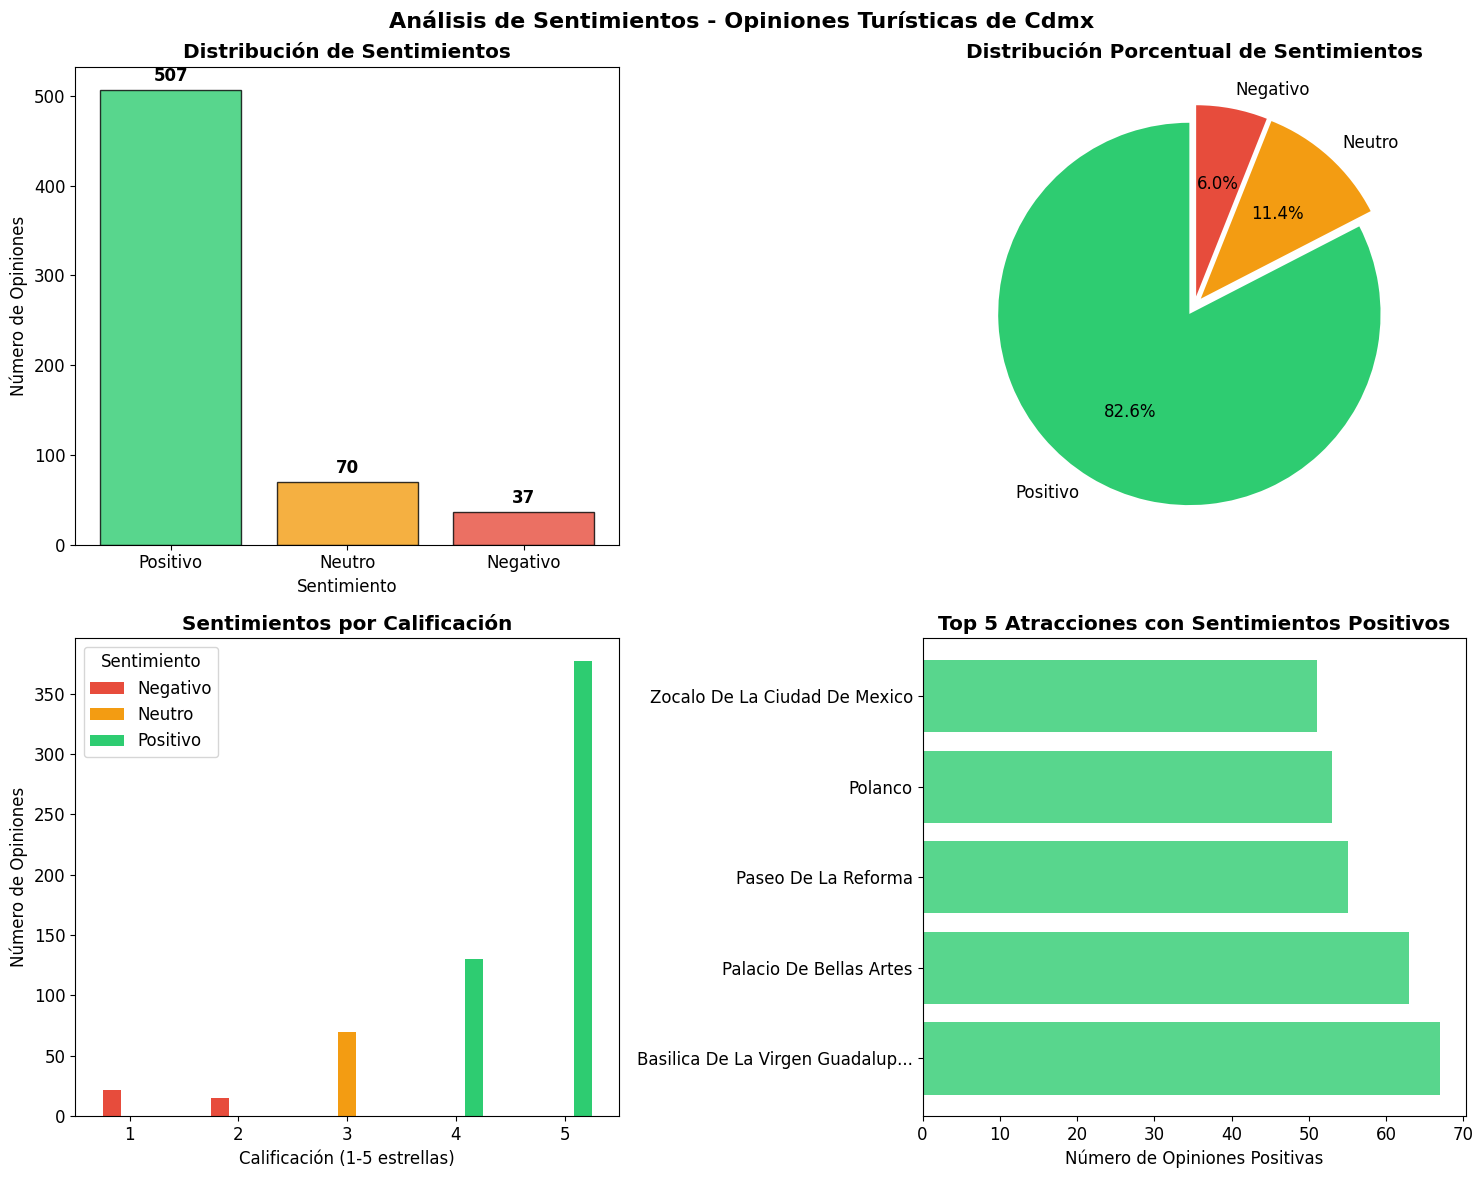

‚úÖ Visualizaciones generadas usando VisualizadorSentimientos (estructura modular)


In [6]:
# Crear visualizaciones de los sentimientos (usando el nuevo visualizador modular)
from sentimientos import VisualizadorSentimientos

visualizador = VisualizadorSentimientos()
ciudad = df['Ciudad'].iloc[0]
fig = visualizador.crear_visualizaciones_basicas(df, ciudad)
plt.show()

print("‚úÖ Visualizaciones generadas usando VisualizadorSentimientos (estructura modular)")

In [7]:
# Mostrar ejemplos representativos de cada sentimiento
analizador.mostrar_todos_los_ejemplos(df, n_ejemplos=3)

# Generar resumen final
analizador.generar_resumen_final(df)

üìù EJEMPLOS REPRESENTATIVOS DE CADA SENTIMIENTO

üéØ EJEMPLOS DE SENTIMIENTO POSITIVO
------------------------------------------------------------

üìå Ejemplo 1:
   üèõÔ∏è Atracci√≥n: Museo Nacional De Antropologia
   ‚≠ê Calificaci√≥n: 5/5
   üìÖ Fecha: 2024-08-01
   üí¨ Opini√≥n: "Museo nacional ¬°Gran museo! Despu√©s de visitar numerosos sitios aztecas, mayas y olmecas, fue muy interesante ver y leer la informaci√≥n. Este lugar es enorme, un museo de dos d√≠as si lees toda la info..."
   --------------------------------------------------

üìå Ejemplo 2:
   üèõÔ∏è Atracci√≥n: Museo Del Templo Mayor
   ‚≠ê Calificaci√≥n: 4/5
   üìÖ Fecha: 2025-01-01
   üí¨ Opini√≥n: "Extraordinarias ruinas visibles al aire libre Extraordinarias ruinas al aire libre visibles desde la calle. Museo anexo cercano con paseos por las ruinas. Templo mesoamericano mexicano construido en s..."
   --------------------------------------------------

üìå Ejemplo 3:
   üèõÔ∏è Atracci√≥n: Jardines Flo

# An√°lisis de Sentimientos con Modelos Preentrenados de HuggingFace

En esta segunda parte del an√°lisis, utilizaremos **dos modelos preentrenados** de HuggingFace para clasificar sentimientos bas√°ndose en el contenido textual de las opiniones, y luego compararemos estos resultados con la clasificaci√≥n basada en calificaciones de estrellas.

## Objetivos de esta secci√≥n:
- Cargar dos modelos preentrenados de HuggingFace optimizados para an√°lisis de sentimientos:
  - **Modelo 1**: `nlptown/bert-base-multilingual-uncased-sentiment` (multiling√ºe general)
  - **Modelo 2**: `cardiffnlp/twitter-xlm-roberta-base-sentiment` (especializado en texto corto)
- Aplicar ambos modelos al contenido textual de las opiniones (columna `TituloReview`)
- Comparar los resultados obtenidos con la clasificaci√≥n basada en calificaciones
- Identificar concordancias y discordancias entre todos los m√©todos
- Analizar ejemplos donde los m√©todos difieren para entender mejor las diferencias
- Evaluar visualmente el rendimiento de cada modelo de forma independiente

In [8]:
# Instalar e importar librer√≠as para modelos preentrenados
print("üì¶ Verificando librer√≠as necesarias para HuggingFace...")

try:
    import transformers
    print("‚úÖ Transformers ya est√° instalado")
except ImportError:
    print("‚è≥ Instalando transformers...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "transformers[torch]"])
    print("‚úÖ Transformers instalado exitosamente")

# Importar el analizador de HuggingFace (nueva estructura modular)
from sentimientos import AnalizadorHuggingFace

print("‚úÖ Analizador de HuggingFace importado correctamente")
print("üìÅ Usando: sentimientos/analizador_huggingface.py")

üì¶ Verificando librer√≠as necesarias para HuggingFace...
‚úÖ Transformers ya est√° instalado
‚úÖ Analizador de HuggingFace importado correctamente
üìÅ Usando: sentimientos/analizador_huggingface.py


In [9]:
# Inicializar el analizador de HuggingFace (nueva clase modular)
print("ü§ñ Inicializando analizador de sentimientos con HuggingFace...")

# Usamos un modelo multiling√ºe optimizado para espa√±ol
# Este modelo funciona bien en hardware limitado (16GB RAM, 6 cores)
analizador_hf = AnalizadorHuggingFace(
    modelo_nombre="nlptown/bert-base-multilingual-uncased-sentiment"
)

# Cargar el modelo
exito = analizador_hf.cargar_modelo()

if exito:
    print("üéØ Modelo recomendado para este hardware:")
    print("   ‚Ä¢ Modelo: bert-base-multilingual-uncased-sentiment")
    print("   ‚Ä¢ Tama√±o: ~400MB aproximadamente")
    print("   ‚Ä¢ Soporte: Multiling√ºe (incluye espa√±ol)")
    print("   ‚Ä¢ Optimizado para: An√°lisis de sentimientos en rese√±as")
    print("üìÅ Usando: AnalizadorHuggingFace (nueva estructura modular)")
else:
    print("‚ùå No se pudo cargar el modelo de HuggingFace")

ü§ñ Inicializando analizador de sentimientos con HuggingFace...
ü§ñ Cargando modelo: nlptown/bert-base-multilingual-uncased-sentiment
‚è≥ Esto puede tomar unos momentos la primera vez...


Device set to use cuda:0


‚úÖ Modelo cargado exitosamente
üåç Modelo: nlptown/bert-base-multilingual-uncased-sentiment
üéØ Modelo recomendado para este hardware:
   ‚Ä¢ Modelo: bert-base-multilingual-uncased-sentiment
   ‚Ä¢ Tama√±o: ~400MB aproximadamente
   ‚Ä¢ Soporte: Multiling√ºe (incluye espa√±ol)
   ‚Ä¢ Optimizado para: An√°lisis de sentimientos en rese√±as
üìÅ Usando: AnalizadorHuggingFace (nueva estructura modular)


In [10]:
# Aplicar an√°lisis de sentimientos con HuggingFace al dataset completo
print("üöÄ Iniciando an√°lisis de sentimientos con modelo preentrenado...")
print("‚ö†Ô∏è  NOTA: Este proceso puede tomar 5-10 minutos dependiendo del hardware")

# Procesar el dataset completo
df_con_hf = analizador_hf.procesar_dataset_completo(df, 'TituloReview')

print(f"\n‚úÖ An√°lisis con HuggingFace completado")
print(f"üìä Dataset ahora contiene {len(df_con_hf.columns)} columnas:")
print(f"   ‚Ä¢ Sentimiento (por calificaci√≥n)")
print(f"   ‚Ä¢ SentimientoHF (por modelo preentrenado)")

# Mostrar una muestra comparativa
print("\n" + "="*80)
print("MUESTRA COMPARATIVA DE AMBOS M√âTODOS")
print("="*80)
display(df_con_hf[['TituloReview', 'Calificacion', 'Sentimiento', 'SentimientoHF']].head(10))

üöÄ Iniciando an√°lisis de sentimientos con modelo preentrenado...
‚ö†Ô∏è  NOTA: Este proceso puede tomar 5-10 minutos dependiendo del hardware
üîÑ Procesando sentimientos con HuggingFace para 614 registros...
‚è≥ Esto puede tomar varios minutos...
   Procesando registro 1/614 (0.2%)


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


   Procesando registro 26/614 (4.2%)
   Procesando registro 51/614 (8.3%)
   Procesando registro 51/614 (8.3%)
   Procesando registro 76/614 (12.4%)
   Procesando registro 76/614 (12.4%)
   Procesando registro 101/614 (16.4%)
   Procesando registro 101/614 (16.4%)
   Procesando registro 126/614 (20.5%)
   Procesando registro 126/614 (20.5%)
   Procesando registro 151/614 (24.6%)
   Procesando registro 151/614 (24.6%)
   Procesando registro 176/614 (28.7%)
   Procesando registro 176/614 (28.7%)
   Procesando registro 201/614 (32.7%)
   Procesando registro 201/614 (32.7%)
   Procesando registro 226/614 (36.8%)
   Procesando registro 226/614 (36.8%)
   Procesando registro 251/614 (40.9%)
   Procesando registro 251/614 (40.9%)
   Procesando registro 276/614 (45.0%)
   Procesando registro 276/614 (45.0%)
   Procesando registro 301/614 (49.0%)
   Procesando registro 301/614 (49.0%)
   Procesando registro 326/614 (53.1%)
   Procesando registro 326/614 (53.1%)
   Procesando registro 351/614 (5

TituloReview  Calificacion  \
0  AVENIDA PRINCIPAL CIUDAD DE M√âXICO Avenida Ciu...             5   
1  Hermoso üíö Es hermoso su paisaje y recorrerlo, ...             5   
2  S√© consciente La foto de la entrada no coincid...             5   
3  Bicicleta dominical en la Reforma Est√° cerrado...             5   
4  Bella avenida M√©xico sin duda un excelente des...             4   
5  Camin√© por parte de esta calle un domingo cuan...             3   
6  "Caminata agradable" El Paseo de la Reforma es...             4   
7  Caminata Es una calle que disfrutas desde que ...             5   
8  Me gust√≥ venir Es una avenida llena de comerci...             5   
9  Muy disfrutable avenida Preciosa avenida paa r...             5   

  Sentimiento SentimientoHF  
0    Positivo      Positivo  
1    Positivo      Positivo  
2    Positivo      Negativo  
3    Positivo      Negativo  
4    Positivo      Positivo  
5      Neutro        Neutro  
6    Positivo      Positivo  
7    Positivo      Positivo  
8    Positivo      Positivo  
9    Positivo      Positivo

In [11]:
# Comparar los resultados de ambos m√©todos (usando el nuevo comparador modular)
from sentimientos import ComparadorSentimientos

print("üîç COMPARACI√ìN ENTRE M√âTODOS DE AN√ÅLISIS")
print("="*60)

# Inicializar el comparador
comparador = ComparadorSentimientos()

# Realizar comparaci√≥n estad√≠stica
comparacion = comparador.comparar_sentimientos(df_con_hf)

# Mostrar estad√≠sticas de comparaci√≥n
comparador.mostrar_comparacion(comparacion)

# Mostrar la tabla de confusi√≥n detallada
print("\nüìä TABLA DE CONFUSI√ìN DETALLADA:")
print("-" * 50)
display(comparacion['tabla_confusion'])

print("üìÅ Usando: ComparadorSentimientos (nueva estructura modular)")

üîç COMPARACI√ìN ENTRE M√âTODOS DE AN√ÅLISIS
üìä COMPARACI√ìN DE M√âTODOS DE AN√ÅLISIS DE SENTIMIENTOS
üéØ CONCORDANCIA GENERAL:
   ‚Ä¢ Total de registros: 614
   ‚Ä¢ Registros concordantes: 532
   ‚Ä¢ Porcentaje de concordancia: 86.6%

üìã ESTAD√çSTICAS POR SENTIMIENTO:
--------------------------------------------------

Positivo:
   üìä Por calificaci√≥n: 507 registros
   ü§ñ Por HuggingFace: 499 registros
   ‚úÖ Concordancia: 471 registros (92.9%)

Neutro:
   üìä Por calificaci√≥n: 70 registros
   ü§ñ Por HuggingFace: 49 registros
   ‚úÖ Concordancia: 29 registros (41.4%)

Negativo:
   üìä Por calificaci√≥n: 37 registros
   ü§ñ Por HuggingFace: 66 registros
   ‚úÖ Concordancia: 32 registros (86.5%)

üìä TABLA DE CONFUSI√ìN DETALLADA:
--------------------------------------------------
üìä COMPARACI√ìN DE M√âTODOS DE AN√ÅLISIS DE SENTIMIENTOS
üéØ CONCORDANCIA GENERAL:
   ‚Ä¢ Total de registros: 614
   ‚Ä¢ Registros concordantes: 532
   ‚Ä¢ Porcentaje de concordancia: 86.6

HuggingFace   Negativo  Neutro  Positivo  All
Calificaci√≥n                                 
Negativo            32       2         3   37
Neutro              16      29        25   70
Positivo            18      18       471  507
All                 66      49       499  614

üìÅ Usando: ComparadorSentimientos (nueva estructura modular)


üìà VISUALIZACIONES DE COMPARACI√ìN


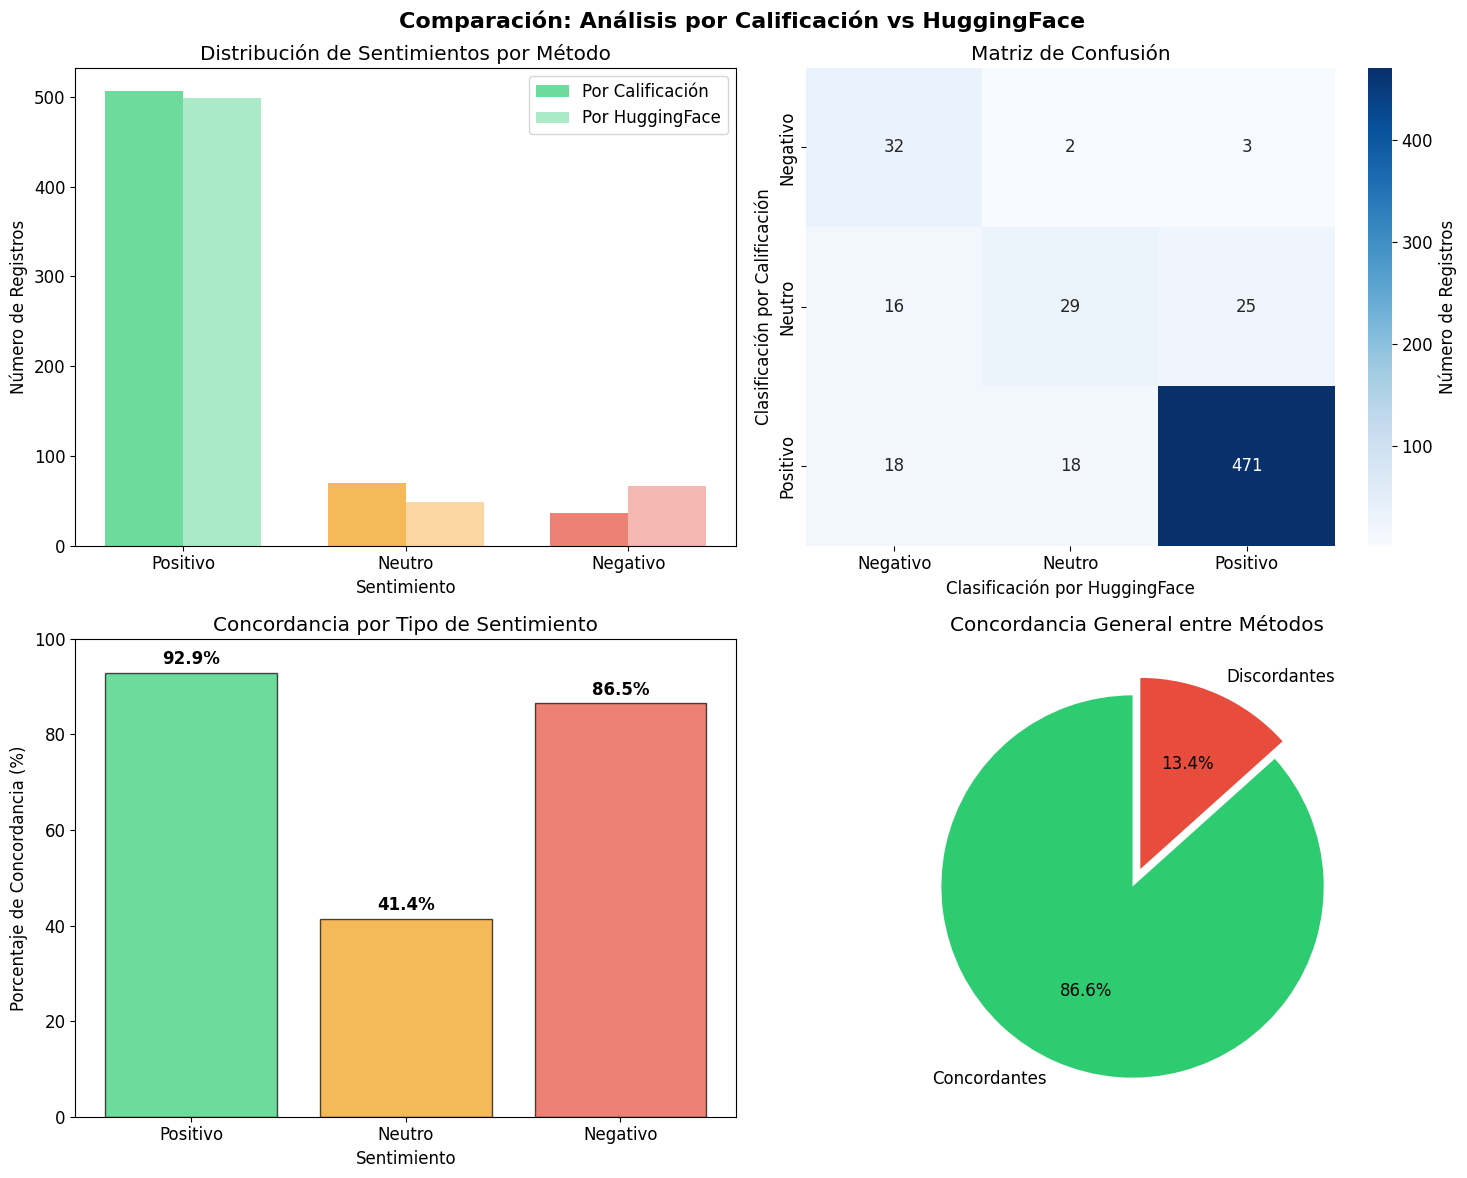

‚úÖ Visualizaciones de comparaci√≥n generadas exitosamente
üìÅ Usando: VisualizadorSentimientos.crear_visualizacion_comparacion()


In [12]:
# Crear visualizaciones de comparaci√≥n entre ambos m√©todos
print("üìà VISUALIZACIONES DE COMPARACI√ìN")
print("="*50)

# Crear las visualizaciones usando el visualizador modular
fig_comparacion = visualizador.crear_visualizacion_comparacion(df_con_hf, comparacion)
plt.show()

print("‚úÖ Visualizaciones de comparaci√≥n generadas exitosamente")
print("üìÅ Usando: VisualizadorSentimientos.crear_visualizacion_comparacion()")

In [13]:
# Mostrar ejemplos donde los m√©todos difieren
print("üîç AN√ÅLISIS DE DISCORDANCIAS ENTRE M√âTODOS")
print("="*70)

# Mostrar algunos ejemplos de discordancias (muestra limitada)
analizador_hf.mostrar_ejemplos_discordantes(df_con_hf, n_ejemplos=3)

print("\n" + "üîÑ" * 25 + " AN√ÅLISIS COMPLETO " + "üîÑ" * 25)

# üìã NUEVA FUNCIONALIDAD: Mostrar TODAS las discordancias completas
# Esta funci√≥n muestra el texto completo de todas las opiniones discordantes
print("\nüÜï Para ver TODAS las opiniones discordantes completas:")
discordantes_completas = analizador_hf.mostrar_todas_discordancias(df_con_hf)

# Calcular m√©tricas de precisi√≥n adicionales usando el comparador
metricas = comparador.calcular_metricas_precision(df_con_hf)
print("\nüìä M√âTRICAS DE PRECISI√ìN DETALLADAS:")
print("="*50)
comparador.mostrar_metricas_precision(metricas)

print("\n" + "="*70)
print("üìä RESUMEN FINAL DE LA COMPARACI√ìN")
print("="*70)
print(f"‚úÖ An√°lisis completado para {len(df_con_hf)} opiniones")
print(f"üèôÔ∏è Ciudad analizada: {df_con_hf['Ciudad'].iloc[0]}")
print(f"üéØ Atracciones √∫nicas: {df_con_hf['Atraccion'].nunique()}")
print(f"\nüìà M√©todos comparados:")
print(f"   ‚Ä¢ Clasificaci√≥n por calificaci√≥n (1-5 estrellas)")
print(f"   ‚Ä¢ Clasificaci√≥n por modelo preentrenado (HuggingFace)")
print(f"\nüîç Concordancia entre m√©todos: {comparacion['porcentaje_concordancia']:.1f}%")
print(f"üìä Casos discordantes: {len(df_con_hf) - comparacion['concordancia_total']} de {len(df_con_hf)}")

print(f"\nüí° EXTRA: Se han mostrado {len(discordantes_completas)} opiniones discordantes completas arriba")
print("üìã Cada opini√≥n se muestra sin cortes para an√°lisis detallado")
print("\nüèóÔ∏è ESTRUCTURA MODULAR UTILIZADA:")
print("   üìÅ sentimientos/analizador_calificaciones.py")
print("   üìÅ sentimientos/analizador_huggingface.py") 
print("   üìÅ sentimientos/visualizaciones_sentimientos.py")
print("   üìÅ sentimientos/comparador_sentimientos.py")

üîç AN√ÅLISIS DE DISCORDANCIAS ENTRE M√âTODOS
üîç EJEMPLOS DE DISCORDANCIAS ENTRE M√âTODOS
üìä Total de discordancias: 82/614 (13.4%)

üéØ Negativo (Calificaci√≥n) ‚Üí Neutro (HuggingFace): 2 casos
------------------------------------------------------------

üìå Ejemplo 1:
   üèõÔ∏è Atracci√≥n: Acuario Michin Ciudad De Mexico
   ‚≠ê Calificaci√≥n: 1/5 ‚Üí Negativo
   ü§ñ HuggingFace: Neutro
   üí¨ Opini√≥n: "El personal muy amable, su trabajo muy bien Deber√≠an de dejar de tener animales en cautiverio, es muy triste como los tienen los ping√ºinos tra√≠an algo de metal en su aleta es espantoso"
   --------------------------------------------------

üìå Ejemplo 2:
   üèõÔ∏è Atracci√≥n: Jardines Flotantes De Xochimilco
   ‚≠ê Calificaci√≥n: 1/5 ‚Üí Negativo
   ü§ñ HuggingFace: Neutro
   üí¨ Opini√≥n: "no muy impresionado Est√° bien para los j√≥venes, solo una trampa para turistas sin mucho que ofrecer. Caro para lo que era. Viaje por un canal cerrado con todos tratando de ven

In [14]:
# Exportar el dataset con an√°lisis de sentimientos incluido
from sentimientos import exportar_dataset_con_sentimientos

print("üíæ EXPORTANDO DATASET CON AN√ÅLISIS DE SENTIMIENTOS")
print("=" * 60)

# Obtener el nombre de la ciudad
ciudad = df_con_hf['Ciudad'].iloc[0]

# Exportar el dataset con la nueva columna SentimientoHF
exito_exportacion = exportar_dataset_con_sentimientos(df_con_hf, ciudad)

if exito_exportacion:
    print(f"\n‚úÖ El dataset de {ciudad} con an√°lisis de sentimientos ha sido guardado exitosamente")
    print(f"üìÅ El archivo incluye todas las columnas originales m√°s 'SentimientoHF'")
    print(f"üîÑ Este archivo ser√° usado en el an√°lisis de subjetividad")
else:
    print(f"\n‚ùå Error al exportar el dataset")

print("\nüìã COLUMNAS INCLUIDAS EN EL DATASET EXPORTADO:")
print("-" * 50)
for i, col in enumerate(df_con_hf.columns, 1):
    print(f"   {i:2}. {col}")

üíæ EXPORTANDO DATASET CON AN√ÅLISIS DE SENTIMIENTOS
‚úÖ Dataset con sentimientos exportado exitosamente
üìÅ Archivo: dataset_cdmx_sentimientos.csv
üìç Ubicaci√≥n: ../data/processed/datasets_por_ciudad/dataset_cdmx_sentimientos.csv
üìä Registros: 614
üìã Columnas incluidas: Titulo, Review, TipoViaje, Calificacion, OrigenAutor, FechaOpinion, FechaEstadia, Ciudad, Atraccion, TituloReview, Sentimiento, SentimientoHF

‚úÖ El dataset de Cdmx con an√°lisis de sentimientos ha sido guardado exitosamente
üìÅ El archivo incluye todas las columnas originales m√°s 'SentimientoHF'
üîÑ Este archivo ser√° usado en el an√°lisis de subjetividad

üìã COLUMNAS INCLUIDAS EN EL DATASET EXPORTADO:
--------------------------------------------------
    1. Titulo
    2. Review
    3. TipoViaje
    4. Calificacion
    5. OrigenAutor
    6. FechaOpinion
    7. FechaEstadia
    8. Ciudad
    9. Atraccion
   10. TituloReview
   11. Sentimiento
   12. SentimientoHF


# An√°lisis con Segundo Modelo: Cardiff NLP (Twitter XLM-RoBERTa)

Ahora vamos a probar un segundo modelo especializado en texto corto y expresivo, entrenado espec√≠ficamente en datos de Twitter. Este modelo podr√≠a ser especialmente efectivo para rese√±as tur√≠sticas debido a su naturaleza concisa y expresiva.

## Caracter√≠sticas del Modelo Cardiff NLP:
- **Modelo**: `cardiffnlp/twitter-xlm-roberta-base-sentiment`
- **Especializaci√≥n**: Texto corto y expresivo (entrenado en Twitter)
- **Arquitectura**: XLM-RoBERTa (multiling√ºe)
- **Ventajas**: Optimizado para captar emociones y sentimientos en texto breve

In [15]:
# Importar el analizador Cardiff NLP (nueva estructura modular)
from sentimientos import AnalizadorCardiff

print("üê¶ MODELO CARDIFF NLP - TWITTER XLM-ROBERTA")
print("=" * 50)
print("üì¶ Importando analizador especializado en texto corto...")

# Inicializar el analizador Cardiff NLP
print("ü§ñ Inicializando analizador Cardiff NLP...")
analizador_cardiff = AnalizadorCardiff(
    modelo_nombre="cardiffnlp/twitter-xlm-roberta-base-sentiment"
)

# Cargar el modelo
exito_cardiff = analizador_cardiff.cargar_modelo()

if exito_cardiff:
    print("üéØ Modelo Cardiff NLP configurado correctamente:")
    print("   ‚Ä¢ Modelo: cardiffnlp/twitter-xlm-roberta-base-sentiment")
    print("   ‚Ä¢ Arquitectura: XLM-RoBERTa (multiling√ºe)")
    print("   ‚Ä¢ Especializaci√≥n: Texto corto y expresivo")
    print("   ‚Ä¢ Entrenado en: Datos de Twitter")
    print("   ‚Ä¢ Ventaja: Captura emociones en texto breve")
    print("üìÅ Usando: AnalizadorCardiff (nueva estructura modular)")
else:
    print("‚ùå No se pudo cargar el modelo Cardiff NLP")

üê¶ MODELO CARDIFF NLP - TWITTER XLM-ROBERTA
üì¶ Importando analizador especializado en texto corto...
ü§ñ Inicializando analizador Cardiff NLP...
ü§ñ Cargando modelo Cardiff NLP: cardiffnlp/twitter-xlm-roberta-base-sentiment
‚è≥ Esto puede tomar unos momentos la primera vez...


Device set to use cuda:0


‚úÖ Modelo Cardiff NLP cargado exitosamente
üåç Modelo: cardiffnlp/twitter-xlm-roberta-base-sentiment
üê¶ Optimizado para: Texto corto y expresivo (entrenado en Twitter)
üéØ Modelo Cardiff NLP configurado correctamente:
   ‚Ä¢ Modelo: cardiffnlp/twitter-xlm-roberta-base-sentiment
   ‚Ä¢ Arquitectura: XLM-RoBERTa (multiling√ºe)
   ‚Ä¢ Especializaci√≥n: Texto corto y expresivo
   ‚Ä¢ Entrenado en: Datos de Twitter
   ‚Ä¢ Ventaja: Captura emociones en texto breve
üìÅ Usando: AnalizadorCardiff (nueva estructura modular)


In [26]:
# Aplicar an√°lisis de sentimientos con Cardiff NLP al dataset completo
print("üöÄ INICIANDO AN√ÅLISIS CON CARDIFF NLP")
print("=" * 60)
print("‚ö†Ô∏è  NOTA: Este proceso puede tomar 5-10 minutos dependiendo del hardware")
print("üê¶ Procesando con modelo especializado en texto corto...")

# Procesar el dataset completo con Cardiff NLP
df_con_cardiff = analizador_cardiff.procesar_dataset_completo(df_con_hf, 'TituloReview')

print(f"\n‚úÖ An√°lisis con Cardiff NLP completado")
print(f"üìä Dataset ahora contiene {len(df_con_cardiff.columns)} columnas:")
print(f"   ‚Ä¢ Sentimiento (por calificaci√≥n)")
print(f"   ‚Ä¢ SentimientoHF (por modelo HuggingFace)")
print(f"   ‚Ä¢ SentimientoCardiff (por modelo Cardiff NLP)")

# Mostrar una muestra comparativa de los tres m√©todos
print("\n" + "="*90)
print("MUESTRA COMPARATIVA DE LOS TRES M√âTODOS")
print("="*90)
display(df_con_cardiff[['TituloReview', 'Calificacion', 'Sentimiento', 'SentimientoHF', 'SentimientoCardiff']].head(10))

üöÄ INICIANDO AN√ÅLISIS CON CARDIFF NLP
‚ö†Ô∏è  NOTA: Este proceso puede tomar 5-10 minutos dependiendo del hardware
üê¶ Procesando con modelo especializado en texto corto...
üîÑ Procesando sentimientos con Cardiff NLP para 614 registros...
‚è≥ Esto puede tomar varios minutos...
   Procesando registro 1/614 (0.2%)
   Procesando registro 26/614 (4.2%)
   Procesando registro 51/614 (8.3%)
   Procesando registro 76/614 (12.4%)
   Procesando registro 101/614 (16.4%)
   Procesando registro 126/614 (20.5%)
   Procesando registro 151/614 (24.6%)
   Procesando registro 176/614 (28.7%)
   Procesando registro 201/614 (32.7%)
   Procesando registro 226/614 (36.8%)
   Procesando registro 251/614 (40.9%)
   Procesando registro 276/614 (45.0%)
   Procesando registro 301/614 (49.0%)
   Procesando registro 326/614 (53.1%)
   Procesando registro 351/614 (57.2%)
   Procesando registro 376/614 (61.2%)
   Procesando registro 401/614 (65.3%)
   Procesando registro 426/614 (69.4%)
   Procesando registro 

TituloReview  Calificacion  \
0  AVENIDA PRINCIPAL CIUDAD DE M√âXICO Avenida Ciu...             5   
1  Hermoso üíö Es hermoso su paisaje y recorrerlo, ...             5   
2  S√© consciente La foto de la entrada no coincid...             5   
3  Bicicleta dominical en la Reforma Est√° cerrado...             5   
4  Bella avenida M√©xico sin duda un excelente des...             4   
5  Camin√© por parte de esta calle un domingo cuan...             3   
6  "Caminata agradable" El Paseo de la Reforma es...             4   
7  Caminata Es una calle que disfrutas desde que ...             5   
8  Me gust√≥ venir Es una avenida llena de comerci...             5   
9  Muy disfrutable avenida Preciosa avenida paa r...             5   

  Sentimiento SentimientoHF SentimientoCardiff  
0    Positivo      Positivo             Neutro  
1    Positivo      Positivo           Negativo  
2    Positivo      Negativo           Negativo  
3    Positivo      Negativo             Neutro  
4    Positivo      Positivo           Positivo  
5      Neutro        Neutro           Negativo  
6    Positivo      Positivo           Positivo  
7    Positivo      Positivo           Positivo  
8    Positivo      Positivo           Positivo  
9    Positivo      Positivo           Positivo

In [17]:
# Comparar Cardiff NLP con el an√°lisis por calificaci√≥n
print("üîç COMPARACI√ìN: CARDIFF NLP vs AN√ÅLISIS POR CALIFICACI√ìN")
print("="*70)

# Crear un diccionario de comparaci√≥n simple para Cardiff vs Calificaci√≥n
comparacion_cardiff_cal = {
    'total_registros': len(df_con_cardiff),
    'concordancia_total': len(df_con_cardiff[df_con_cardiff['Sentimiento'] == df_con_cardiff['SentimientoCardiff']]),
    'porcentaje_concordancia': (len(df_con_cardiff[df_con_cardiff['Sentimiento'] == df_con_cardiff['SentimientoCardiff']]) / len(df_con_cardiff)) * 100
}

print(f"üìä Total de registros analizados: {comparacion_cardiff_cal['total_registros']}")
print(f"‚úÖ Registros concordantes: {comparacion_cardiff_cal['concordancia_total']}")
print(f"‚ùå Registros discordantes: {comparacion_cardiff_cal['total_registros'] - comparacion_cardiff_cal['concordancia_total']}")
print(f"üìà Porcentaje de concordancia: {comparacion_cardiff_cal['porcentaje_concordancia']:.1f}%")

# Mostrar la tabla de confusi√≥n detallada
print("\nüìä TABLA DE CONFUSI√ìN DETALLADA: CALIFICACI√ìN vs CARDIFF NLP")
print("-" * 60)
tabla_confusion_cardiff = pd.crosstab(df_con_cardiff['Sentimiento'], df_con_cardiff['SentimientoCardiff'], 
                                     rownames=['Calificaci√≥n'], colnames=['Cardiff NLP'], margins=True)
display(tabla_confusion_cardiff)

print("üìÅ Usando: AnalizadorCardiff.mostrar_ejemplos_discordantes()")

üîç COMPARACI√ìN: CARDIFF NLP vs AN√ÅLISIS POR CALIFICACI√ìN
üìä Total de registros analizados: 614
‚úÖ Registros concordantes: 465
‚ùå Registros discordantes: 149
üìà Porcentaje de concordancia: 75.7%

üìä TABLA DE CONFUSI√ìN DETALLADA: CALIFICACI√ìN vs CARDIFF NLP
------------------------------------------------------------


Cardiff NLP   Negativo  Neutro  Positivo  All
Calificaci√≥n                                 
Negativo            31       1         5   37
Neutro              34      12        24   70
Positivo            38      47       422  507
All                103      60       451  614

üìÅ Usando: AnalizadorCardiff.mostrar_ejemplos_discordantes()


üìà VISUALIZACIONES: CARDIFF NLP vs CALIFICACI√ìN


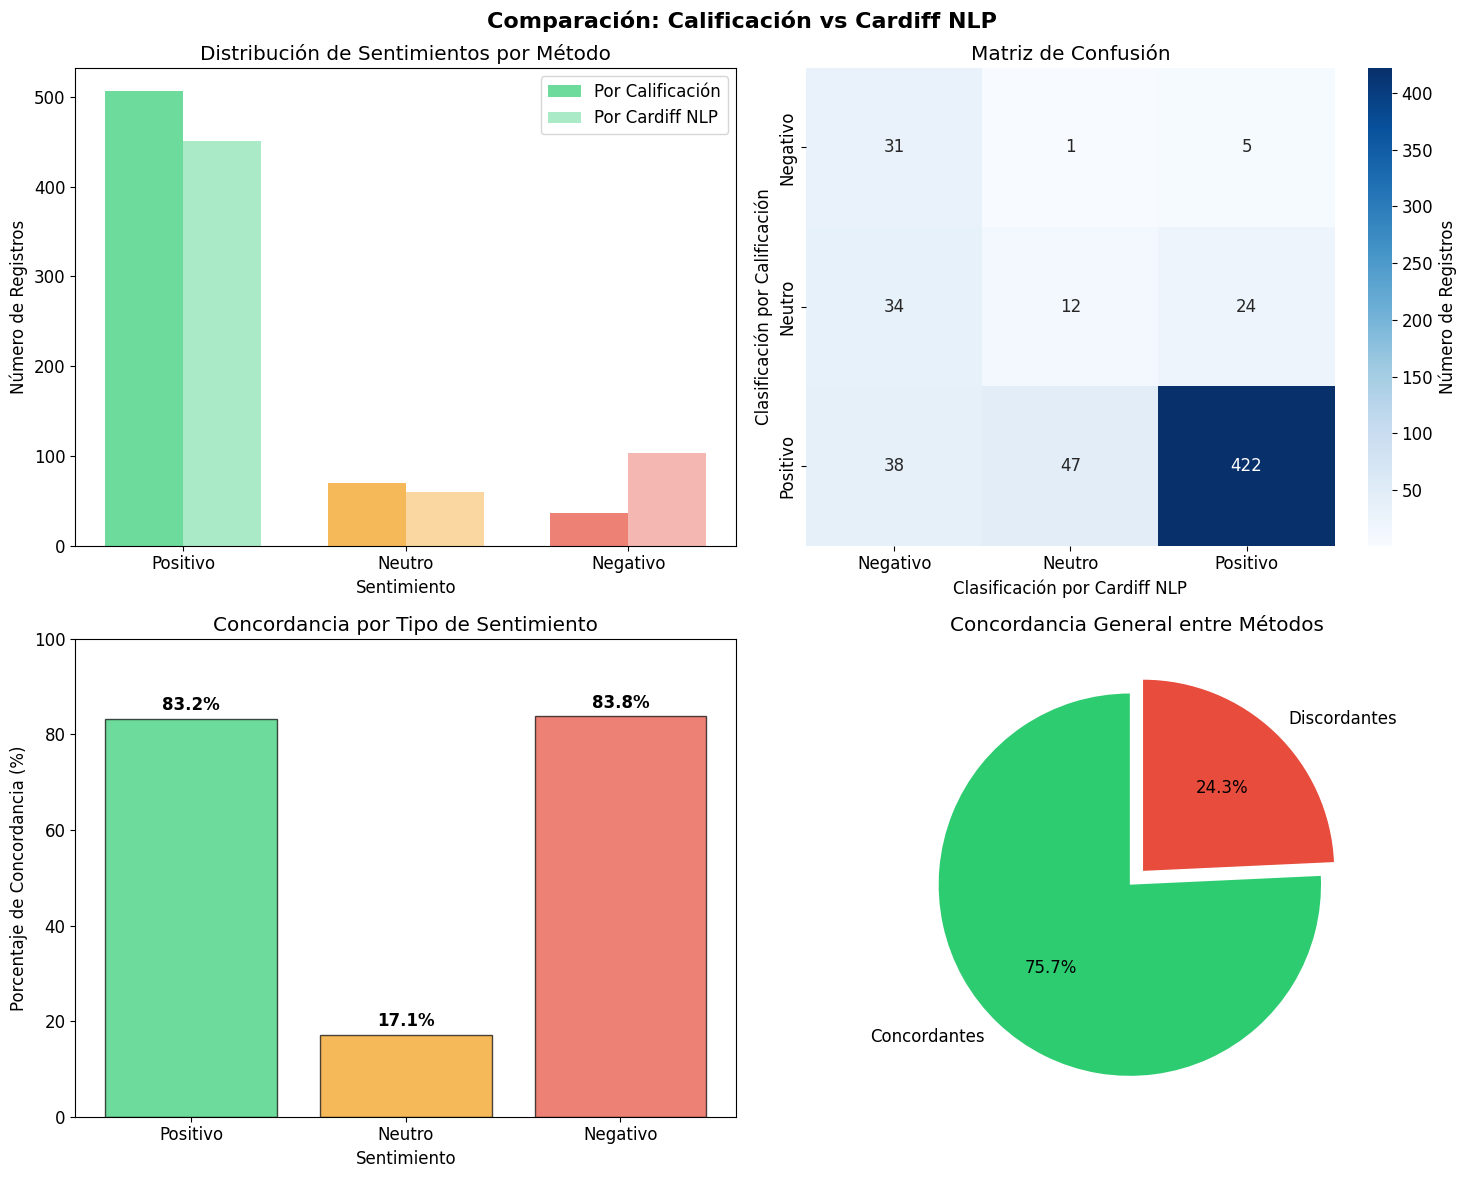

‚úÖ Visualizaciones Cardiff NLP vs Calificaci√≥n generadas exitosamente
üìÅ Usando: VisualizadorSentimientos.crear_visualizacion_comparacion_cardiff()


In [18]:
# Crear visualizaciones de comparaci√≥n Cardiff NLP vs Calificaci√≥n
print("üìà VISUALIZACIONES: CARDIFF NLP vs CALIFICACI√ìN")
print("="*60)

# Crear las visualizaciones usando el visualizador modular
fig_cardiff_cal = visualizador.crear_visualizacion_comparacion_cardiff(
    df_con_cardiff, 
    comparacion_cardiff_cal, 
    columna_referencia='Sentimiento'
)
plt.show()

print("‚úÖ Visualizaciones Cardiff NLP vs Calificaci√≥n generadas exitosamente")
print("üìÅ Usando: VisualizadorSentimientos.crear_visualizacion_comparacion_cardiff()")

In [19]:
# Mostrar ejemplos donde Cardiff NLP difiere de la calificaci√≥n
print("üîç AN√ÅLISIS DE DISCORDANCIAS: CARDIFF NLP vs CALIFICACI√ìN")
print("="*70)

# Mostrar algunos ejemplos de discordancias (muestra limitada)
analizador_cardiff.mostrar_ejemplos_discordantes(df_con_cardiff, columna_referencia='Sentimiento', n_ejemplos=3)

print("\n" + "üîÑ" * 25 + " AN√ÅLISIS COMPLETO CARDIFF " + "üîÑ" * 25)

# üìã NUEVA FUNCIONALIDAD: Mostrar TODAS las discordancias completas Cardiff vs Calificaci√≥n
print("\nüÜï Para ver TODAS las opiniones discordantes completas Cardiff vs Calificaci√≥n:")
discordantes_cardiff_cal = analizador_cardiff.mostrar_todas_discordancias(df_con_cardiff, columna_referencia='Sentimiento')

print(f"\nüí° EXTRA: Se han mostrado {len(discordantes_cardiff_cal)} discordancias Cardiff vs Calificaci√≥n arriba")
print("üìã Cada opini√≥n se muestra sin cortes para an√°lisis detallado")

üîç AN√ÅLISIS DE DISCORDANCIAS: CARDIFF NLP vs CALIFICACI√ìN
üîç EJEMPLOS DE DISCORDANCIAS: CARDIFF NLP vs SENTIMIENTO
üìä Total de discordancias: 149/614 (24.3%)

üéØ Negativo (Sentimiento) ‚Üí Neutro (Cardiff): 1 casos
------------------------------------------------------------

üìå Ejemplo 1:
   üèõÔ∏è Atracci√≥n: Jardines Flotantes De Xochimilco
   ‚≠ê Calificaci√≥n: 1/5
   üîÑ Sentimiento: Negativo
   üê¶ Cardiff NLP: Neutro
   üí¨ Opini√≥n: "Trampa tur√≠stica Trampa tur√≠stica a evitar a toda costa. ¬°Realmente te llevan de paseo! Te cobran de m√°s por un peque√±o viaje entre botes llenos de borrachos."
   --------------------------------------------------

üéØ Negativo (Sentimiento) ‚Üí Positivo (Cardiff): 5 casos
------------------------------------------------------------

üìå Ejemplo 1:
   üèõÔ∏è Atracci√≥n: Mercado De Artesanias La Ciudadela
   ‚≠ê Calificaci√≥n: 2/5
   üîÑ Sentimiento: Negativo
   üê¶ Cardiff NLP: Positivo
   üí¨ Opini√≥n: "Lugar seguro para

In [20]:
# Comparar Cardiff NLP con HuggingFace (ambos modelos de ML)
print("ü§ñ COMPARACI√ìN ENTRE MODELOS DE ML: HUGGINGFACE vs CARDIFF NLP")
print("="*80)

# Crear comparaci√≥n entre los dos modelos de ML
comparacion_hf_cardiff = {
    'total_registros': len(df_con_cardiff),
    'concordancia_total': len(df_con_cardiff[df_con_cardiff['SentimientoHF'] == df_con_cardiff['SentimientoCardiff']]),
    'porcentaje_concordancia': (len(df_con_cardiff[df_con_cardiff['SentimientoHF'] == df_con_cardiff['SentimientoCardiff']]) / len(df_con_cardiff)) * 100
}

print(f"üìä Total de registros analizados: {comparacion_hf_cardiff['total_registros']}")
print(f"‚úÖ Registros concordantes entre modelos ML: {comparacion_hf_cardiff['concordancia_total']}")
print(f"‚ùå Registros discordantes entre modelos ML: {comparacion_hf_cardiff['total_registros'] - comparacion_hf_cardiff['concordancia_total']}")
print(f"üìà Concordancia entre modelos ML: {comparacion_hf_cardiff['porcentaje_concordancia']:.1f}%")

# Mostrar la tabla de confusi√≥n entre modelos ML
print("\nüìä TABLA DE CONFUSI√ìN: HUGGINGFACE vs CARDIFF NLP")
print("-" * 60)
tabla_confusion_ml = pd.crosstab(df_con_cardiff['SentimientoHF'], df_con_cardiff['SentimientoCardiff'], 
                               rownames=['HuggingFace'], colnames=['Cardiff NLP'], margins=True)
display(tabla_confusion_ml)

ü§ñ COMPARACI√ìN ENTRE MODELOS DE ML: HUGGINGFACE vs CARDIFF NLP
üìä Total de registros analizados: 614
‚úÖ Registros concordantes entre modelos ML: 497
‚ùå Registros discordantes entre modelos ML: 117
üìà Concordancia entre modelos ML: 80.9%

üìä TABLA DE CONFUSI√ìN: HUGGINGFACE vs CARDIFF NLP
------------------------------------------------------------


Cardiff NLP  Negativo  Neutro  Positivo  All
HuggingFace                                 
Negativo           56       4         6   66
Neutro             23      11        15   49
Positivo           24      45       430  499
All               103      60       451  614

üìà VISUALIZACIONES: HUGGINGFACE vs CARDIFF NLP


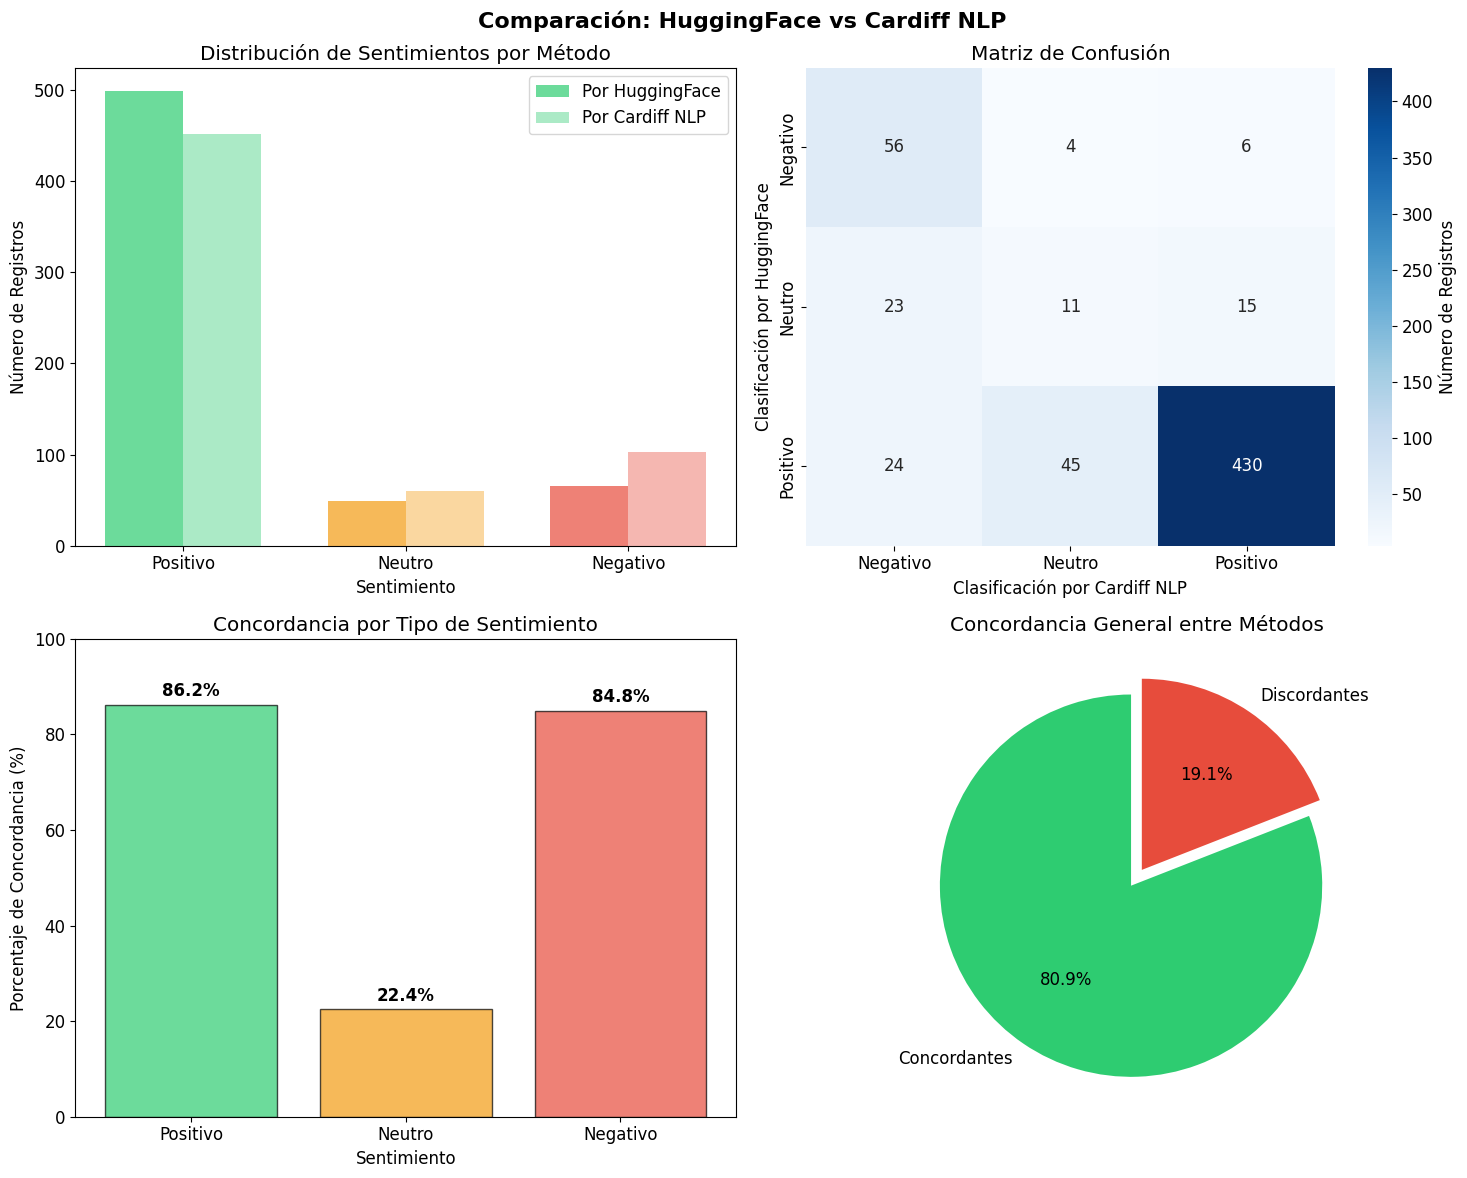

‚úÖ Visualizaciones HuggingFace vs Cardiff NLP generadas exitosamente
üìÅ Usando: VisualizadorSentimientos.crear_visualizacion_comparacion_cardiff()


In [21]:
# Crear visualizaciones de comparaci√≥n entre modelos ML
print("üìà VISUALIZACIONES: HUGGINGFACE vs CARDIFF NLP")
print("="*60)

# Crear las visualizaciones comparando los dos modelos ML
fig_hf_cardiff = visualizador.crear_visualizacion_comparacion_cardiff(
    df_con_cardiff, 
    comparacion_hf_cardiff, 
    columna_referencia='SentimientoHF'
)
plt.show()

print("‚úÖ Visualizaciones HuggingFace vs Cardiff NLP generadas exitosamente")
print("üìÅ Usando: VisualizadorSentimientos.crear_visualizacion_comparacion_cardiff()")

In [22]:
# Mostrar discordancias entre los dos modelos de ML
print("üîç AN√ÅLISIS DE DISCORDANCIAS ENTRE MODELOS ML: HUGGINGFACE vs CARDIFF")
print("="*80)

# Mostrar algunos ejemplos de discordancias entre modelos ML
analizador_cardiff.mostrar_ejemplos_discordantes(df_con_cardiff, columna_referencia='SentimientoHF', n_ejemplos=3)

print("\n" + "üîÑ" * 25 + " DISCORDANCIAS ML COMPLETAS " + "üîÑ" * 25)

# Mostrar TODAS las discordancias entre modelos ML
print("\nüÜï Para ver TODAS las discordancias entre modelos ML:")
discordantes_ml = analizador_cardiff.mostrar_todas_discordancias(df_con_cardiff, columna_referencia='SentimientoHF')

print(f"\nüí° EXTRA: Se han mostrado {len(discordantes_ml)} discordancias entre modelos ML")
print("ü§ñ An√°lisis detallado: HuggingFace vs Cardiff NLP")

üîç AN√ÅLISIS DE DISCORDANCIAS ENTRE MODELOS ML: HUGGINGFACE vs CARDIFF
üîç EJEMPLOS DE DISCORDANCIAS: CARDIFF NLP vs SENTIMIENTOHF
üìä Total de discordancias: 117/614 (19.1%)

üéØ Negativo (SentimientoHF) ‚Üí Neutro (Cardiff): 4 casos
------------------------------------------------------------

üìå Ejemplo 1:
   üèõÔ∏è Atracci√≥n: Paseo De La Reforma
   ‚≠ê Calificaci√≥n: 5/5
   üîÑ SentimientoHF: Negativo
   üê¶ Cardiff NLP: Neutro
   üí¨ Opini√≥n: "Bicicleta dominical en la Reforma Est√° cerrado a los coches el domingo, as√≠ que alquilamos bicicletas y nos unimos a los otros ciclistas, corredores y patinetes a lo largo del Paseo de la Reforma"
   --------------------------------------------------

üìå Ejemplo 2:
   üèõÔ∏è Atracci√≥n: Jardines Flotantes De Xochimilco
   ‚≠ê Calificaci√≥n: 1/5
   üîÑ SentimientoHF: Negativo
   üê¶ Cardiff NLP: Neutro
   üí¨ Opini√≥n: "Trampa tur√≠stica Trampa tur√≠stica a evitar a toda costa. ¬°Realmente te llevan de paseo! Te cobran de

üìä VISUALIZACI√ìN COMPARATIVA DE LOS TRES M√âTODOS
üîÑ Calificaci√≥n vs HuggingFace vs Cardiff NLP


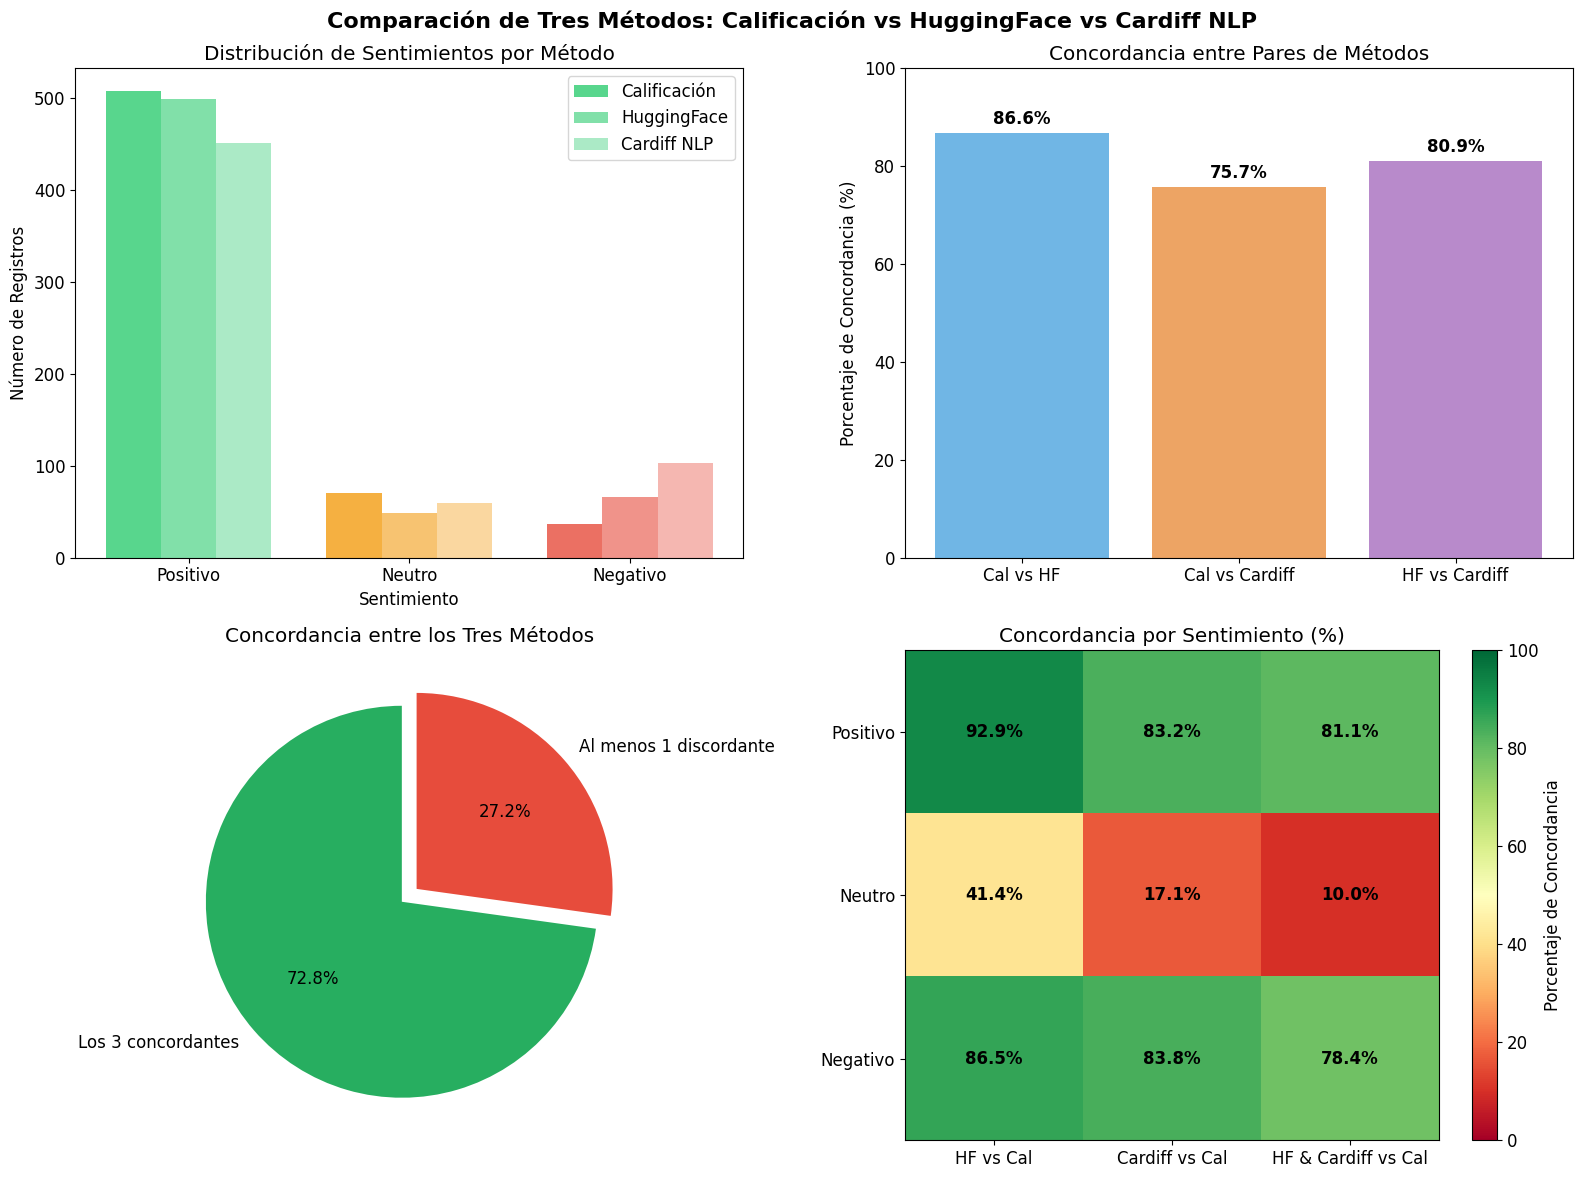

‚úÖ Visualizaci√≥n comparativa de tres m√©todos generada exitosamente
üìÅ Usando: VisualizadorSentimientos.crear_visualizacion_comparacion_tres_modelos()


In [23]:
# Crear visualizaci√≥n comparativa de los tres m√©todos
print("üìä VISUALIZACI√ìN COMPARATIVA DE LOS TRES M√âTODOS")
print("="*70)
print("üîÑ Calificaci√≥n vs HuggingFace vs Cardiff NLP")

# Crear la visualizaci√≥n de comparaci√≥n de tres m√©todos
fig_tres_metodos = visualizador.crear_visualizacion_comparacion_tres_modelos(df_con_cardiff)
if fig_tres_metodos:
    plt.show()
    print("‚úÖ Visualizaci√≥n comparativa de tres m√©todos generada exitosamente")
else:
    print("‚ùå Error generando visualizaci√≥n de tres m√©todos")

print("üìÅ Usando: VisualizadorSentimientos.crear_visualizacion_comparacion_tres_modelos()")

In [24]:
# Resumen final del an√°lisis con ambos modelos
print("üìä RESUMEN FINAL: EVALUACI√ìN INDEPENDIENTE DE MODELOS")
print("="*80)

ciudad = df_con_cardiff['Ciudad'].iloc[0]

print(f"‚úÖ An√°lisis completado para {len(df_con_cardiff)} opiniones")
print(f"üèôÔ∏è Ciudad analizada: {ciudad}")
print(f"üéØ Atracciones √∫nicas: {df_con_cardiff['Atraccion'].nunique()}")

print(f"\nüìà TRES M√âTODOS EVALUADOS:")
print(f"   1Ô∏è‚É£ Clasificaci√≥n por calificaci√≥n (1-5 estrellas)")
print(f"   2Ô∏è‚É£ Modelo HuggingFace: nlptown/bert-base-multilingual-uncased-sentiment")
print(f"   3Ô∏è‚É£ Modelo Cardiff NLP: cardiffnlp/twitter-xlm-roberta-base-sentiment")

# Calcular concordancias entre pares
concordancia_cal_hf = len(df_con_cardiff[df_con_cardiff['Sentimiento'] == df_con_cardiff['SentimientoHF']]) / len(df_con_cardiff) * 100
concordancia_cal_cardiff = len(df_con_cardiff[df_con_cardiff['Sentimiento'] == df_con_cardiff['SentimientoCardiff']]) / len(df_con_cardiff) * 100
concordancia_hf_cardiff = len(df_con_cardiff[df_con_cardiff['SentimientoHF'] == df_con_cardiff['SentimientoCardiff']]) / len(df_con_cardiff) * 100

print(f"\nüîç CONCORDANCIAS ENTRE PARES:")
print(f"   üìä Calificaci√≥n vs HuggingFace: {concordancia_cal_hf:.1f}%")
print(f"   üìä Calificaci√≥n vs Cardiff NLP: {concordancia_cal_cardiff:.1f}%")  
print(f"   üìä HuggingFace vs Cardiff NLP: {concordancia_hf_cardiff:.1f}%")

# Concordancia perfecta entre los tres
concordancia_total_tres = len(df_con_cardiff[(df_con_cardiff['Sentimiento'] == df_con_cardiff['SentimientoHF']) & 
                                           (df_con_cardiff['Sentimiento'] == df_con_cardiff['SentimientoCardiff'])]) / len(df_con_cardiff) * 100

print(f"\n‚ú® CONCORDANCIA PERFECTA (los 3 m√©todos): {concordancia_total_tres:.1f}%")
print(f"üîÑ Al menos un m√©todo discorda: {100 - concordancia_total_tres:.1f}%")

print(f"\nüèóÔ∏è ESTRUCTURA MODULAR UTILIZADA:")
print(f"   üìÅ sentimientos/analizador_calificaciones.py")
print(f"   üìÅ sentimientos/analizador_huggingface.py") 
print(f"   üìÅ sentimientos/analizador_cardiff.py")
print(f"   üìÅ sentimientos/visualizaciones_sentimientos.py")
print(f"   üìÅ sentimientos/comparador_sentimientos.py")

print(f"\nüí° EVALUACI√ìN INDEPENDIENTE COMPLETADA")
print(f"üéØ Cada modelo ha sido evaluado independientemente para comparaci√≥n visual")
print(f"üìã Resultados disponibles para an√°lisis comparativo del usuario")

üìä RESUMEN FINAL: EVALUACI√ìN INDEPENDIENTE DE MODELOS
‚úÖ An√°lisis completado para 614 opiniones
üèôÔ∏è Ciudad analizada: Cdmx
üéØ Atracciones √∫nicas: 10

üìà TRES M√âTODOS EVALUADOS:
   1Ô∏è‚É£ Clasificaci√≥n por calificaci√≥n (1-5 estrellas)
   2Ô∏è‚É£ Modelo HuggingFace: nlptown/bert-base-multilingual-uncased-sentiment
   3Ô∏è‚É£ Modelo Cardiff NLP: cardiffnlp/twitter-xlm-roberta-base-sentiment

üîç CONCORDANCIAS ENTRE PARES:
   üìä Calificaci√≥n vs HuggingFace: 86.6%
   üìä Calificaci√≥n vs Cardiff NLP: 75.7%
   üìä HuggingFace vs Cardiff NLP: 80.9%

‚ú® CONCORDANCIA PERFECTA (los 3 m√©todos): 72.8%
üîÑ Al menos un m√©todo discorda: 27.2%

üèóÔ∏è ESTRUCTURA MODULAR UTILIZADA:
   üìÅ sentimientos/analizador_calificaciones.py
   üìÅ sentimientos/analizador_huggingface.py
   üìÅ sentimientos/analizador_cardiff.py
   üìÅ sentimientos/visualizaciones_sentimientos.py
   üìÅ sentimientos/comparador_sentimientos.py

üí° EVALUACI√ìN INDEPENDIENTE COMPLETADA
üéØ Cada mod

In [25]:
# Exportar el dataset con an√°lisis de ambos modelos incluido
from sentimientos import exportar_dataset_con_ambos_sentimientos

print("üíæ EXPORTANDO DATASET CON AMBOS MODELOS DE SENTIMIENTOS")
print("=" * 70)

# Obtener el nombre de la ciudad
ciudad = df_con_cardiff['Ciudad'].iloc[0]

# Exportar el dataset con ambas columnas de sentimientos ML
exito_exportacion_completo = exportar_dataset_con_ambos_sentimientos(df_con_cardiff, ciudad)

if exito_exportacion_completo:
    print(f"\n‚úÖ El dataset de {ciudad} con ambos modelos ha sido guardado exitosamente")
    print(f"üìÅ El archivo incluye todas las columnas originales m√°s:")
    print(f"   ü§ñ SentimientoHF (HuggingFace)")
    print(f"   üê¶ SentimientoCardiff (Cardiff NLP)")
    print(f"üîÑ Este archivo contiene la evaluaci√≥n completa para an√°lisis posterior")
else:
    print(f"\n‚ùå Error al exportar el dataset completo")

print("\nüìã COLUMNAS FINALES EN EL DATASET:")
print("-" * 50)
for i, col in enumerate(df_con_cardiff.columns, 1):
    emoji = "‚≠ê" if col == "Sentimiento" else "ü§ñ" if col == "SentimientoHF" else "üê¶" if col == "SentimientoCardiff" else "üìÑ"
    print(f"   {i:2}. {emoji} {col}")

print("\nüéâ AN√ÅLISIS DE SENTIMIENTOS COMPLETADO CON √âXITO")
print("üìä Tres m√©todos evaluados independientemente")
print("üíæ Datos guardados para an√°lisis posterior")

üíæ EXPORTANDO DATASET CON AMBOS MODELOS DE SENTIMIENTOS
‚úÖ Dataset con ambos modelos de sentimientos exportado exitosamente
üìÅ Archivo: dataset_cdmx_sentimientos_completo.csv
üìç Ubicaci√≥n: ../data/processed/datasets_por_ciudad/dataset_cdmx_sentimientos_completo.csv
üìä Registros: 614
ü§ñ Modelos incluidos: HuggingFace + Cardiff NLP
üìã Columnas incluidas: Titulo, Review, TipoViaje, Calificacion, OrigenAutor, FechaOpinion, FechaEstadia, Ciudad, Atraccion, TituloReview, Sentimiento, SentimientoHF, SentimientoCardiff

‚úÖ El dataset de Cdmx con ambos modelos ha sido guardado exitosamente
üìÅ El archivo incluye todas las columnas originales m√°s:
   ü§ñ SentimientoHF (HuggingFace)
   üê¶ SentimientoCardiff (Cardiff NLP)
üîÑ Este archivo contiene la evaluaci√≥n completa para an√°lisis posterior

üìã COLUMNAS FINALES EN EL DATASET:
--------------------------------------------------
    1. üìÑ Titulo
    2. üìÑ Review
    3. üìÑ TipoViaje
    4. üìÑ Calificacion
    5. üì